### exercise 7: tree based methods 

### task 4: boosting 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import plot_partial_dependence

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df[df.columns[0:-1]].values 
y = df['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [4]:
booster = GradientBoostingRegressor(loss='ls', learning_rate=0.001, n_estimators=5000, max_depth=4, 
                                    random_state=0)

boost_est = booster.fit(X_train, y_train)

In [5]:
feature_importances = pd.Series(data=boost_est.feature_importances_, index=list(df.columns[0:-1]))
sorted_feature_importances = feature_importances.sort_values(axis=0, ascending=False)
sorted_feature_importances

lstat      0.609504
rm         0.220978
dis        0.067140
ptratio    0.034377
crim       0.025301
age        0.014906
tax        0.012276
black      0.005395
indus      0.004887
nox        0.002254
chas       0.001389
rad        0.001086
zn         0.000507
dtype: float64

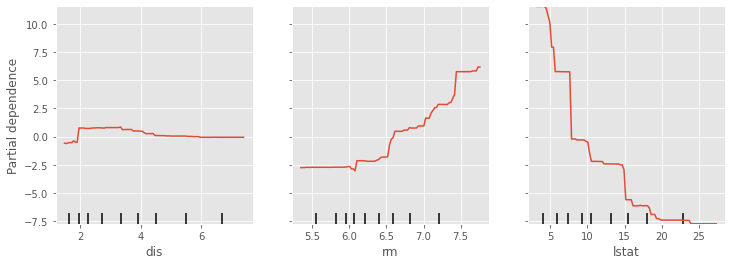

In [6]:
feature_idxs=np.argsort(feature_importances.values)[-3:]

fig, axs = plt.subplots(1,1, figsize=(12,4))
plot_partial_dependence(boost_est, X_train, features=feature_idxs, feature_names=feature_importances.index.tolist(), ax=axs);

In [7]:
y_pred = boost_est.predict(X_test)
mse = np.mean((y_test-y_pred)**2)
print("Test MSE = ", mse)

Test MSE =  17.51136479698184
